In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='ttv'

In [2]:
import lightkurve as lk
%matplotlib inline

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jp/.lightkurve/cache. Please move all the files in the legacy directory /home/jp/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [3]:
import pandas as pd

resonant_toi = pd.read_csv('../data/tics_resonance_from_toi.csv', index_col=0)
resonant_toi

,tic,1st order,2nd order
0,425997655,True,True
1,142276270,True,True
2,150428135,True,True
3,29781292,True,True
4,269701147,True,True
5,307210830,True,True
6,54962195,True,True
7,318022259,True,True
8,259377017,True,True
9,441798995,True,True


In [3]:
import sys
sys.path.insert(0, '../code')
from utils import get_tois

df = get_tois()

Loaded:  ../data/TOIs.csv


In [5]:
tic = 425997655
d = df[df['TIC ID'].apply(str).str.contains(str(tic))].reset_index(drop=True)
d[["Period (days)","Epoch (BJD)"]]

,Period (days),Epoch (BJD)
0,17.667133,2.458325e+06
1,29.797620,2.458340e+06
2,12.162217,2.458336e+06
3,3.976664,2.458326e+06
4,7.907672,2.458331e+06


In [6]:
multi_sector = False

result = lk.search_lightcurve(f'TIC {tic}', author='SPOC')

if multi_sector:
    lc = result.download_all().stitch()
else:
    lc = result.download()

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 13 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi174.png


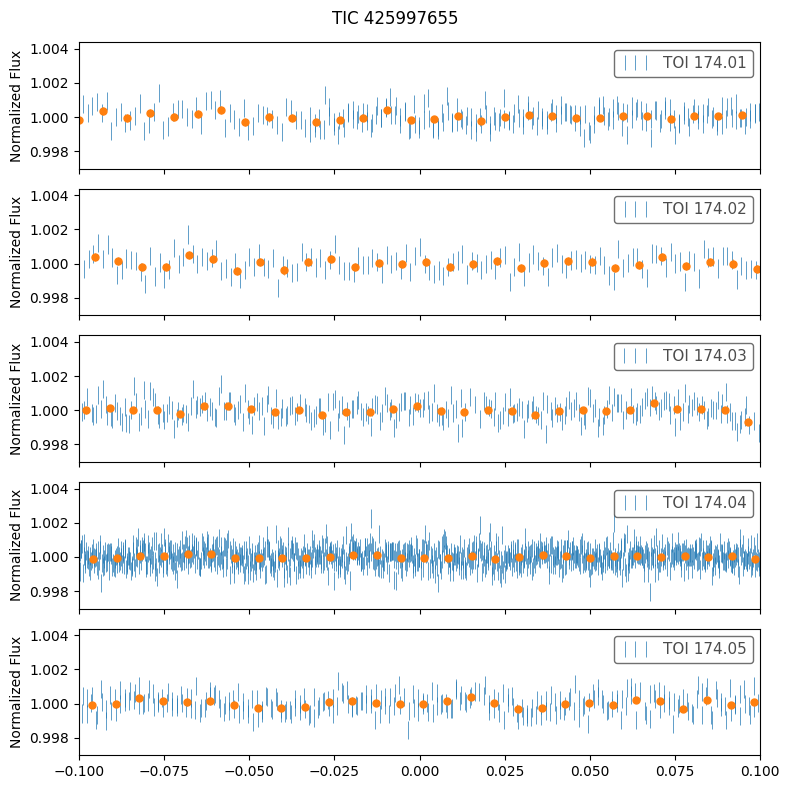

In [10]:
import matplotlib.pyplot as pl
import astropy.units as u

N = len(d)
fig, axs = pl.subplots(N, 1, figsize=(8,8), sharex=True, tight_layout=True)

axs = axs.flatten()

bin_in_mins = 10
for i,row in d.iterrows():
    toi = row['TOI']
    p, t0 = row["Period (days)"], row["Epoch (BJD)"] - 2457000
    fold = lc.flatten().fold(period=p, epoch_time=t0)
    _ = fold.errorbar(label=f"TOI {toi}", ax=axs[i])
    _ = fold.bin(time_bin_size=bin_in_mins*u.minute).errorbar(marker='o', ms=5, label="_nolegend_", ax=axs[i])
    tdur = row['Duration (hours)']/24
    if i<N:
        axs[i].set_xlabel("")
    axs[i].set_xlim(-0.1,0.1)
fig.suptitle(f"TIC {tic}")
fp = f"../data/tois/toi{str(toi).split('.')[0]}.png"
fig.savefig(fp, bbox_inches='tight')
print('Saved: ', fp)

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 13 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi174


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 8 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi1136


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 31 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi700


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 27 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi282


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 27 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi1339


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 23 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi175


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi663


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi1730


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi270


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 38 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi2269


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi696


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi4495


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 27 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi1749


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi5520


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi4323


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi406


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 38 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi216


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi1097


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi2104


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi396


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 39 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/tmp/ipykernel_31700/3898474416.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = pl.subplots(N, 1, figsize=(8,8), sharex=True, tight_layout=True)


Saved:  ../data/tois/toi1670


/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Saved:  ../data/tois/toi6054


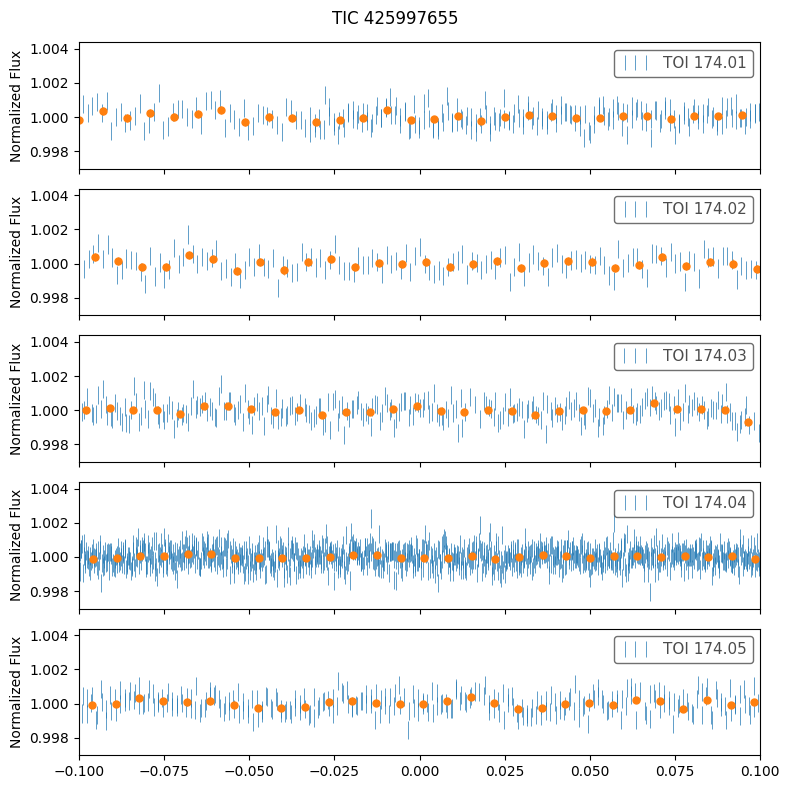

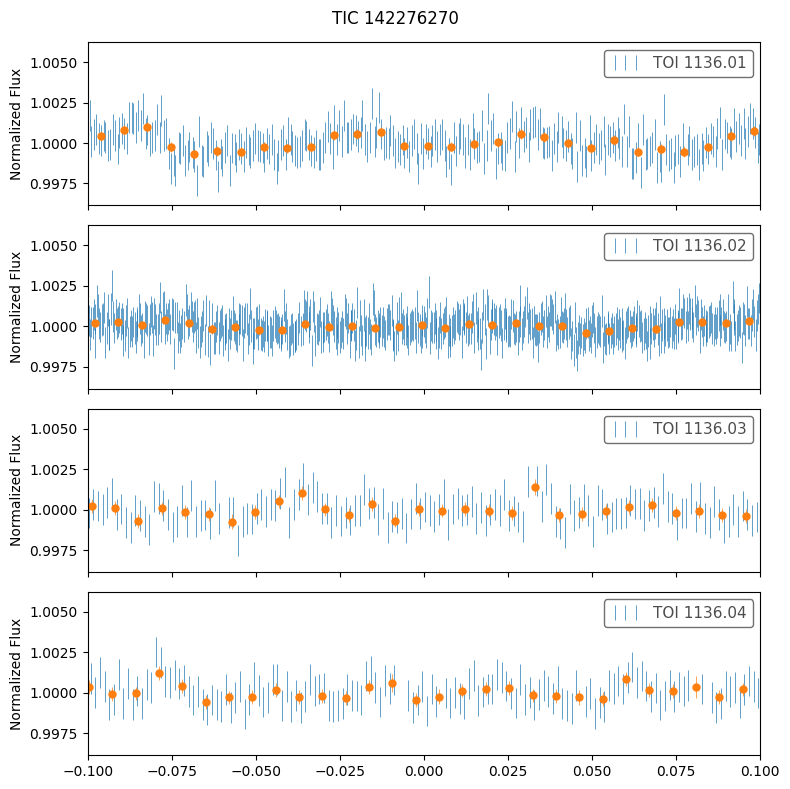

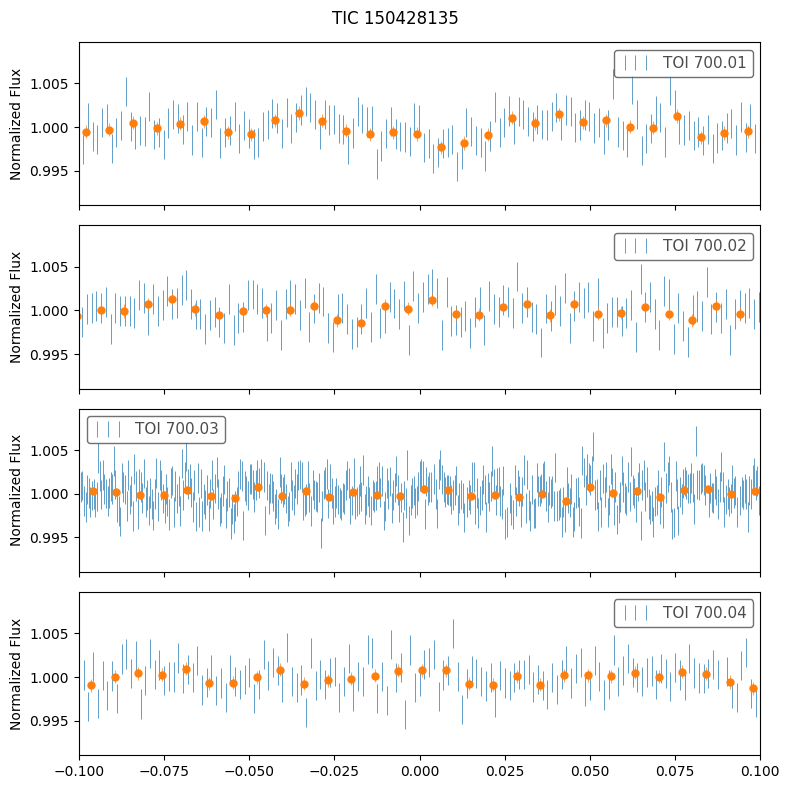

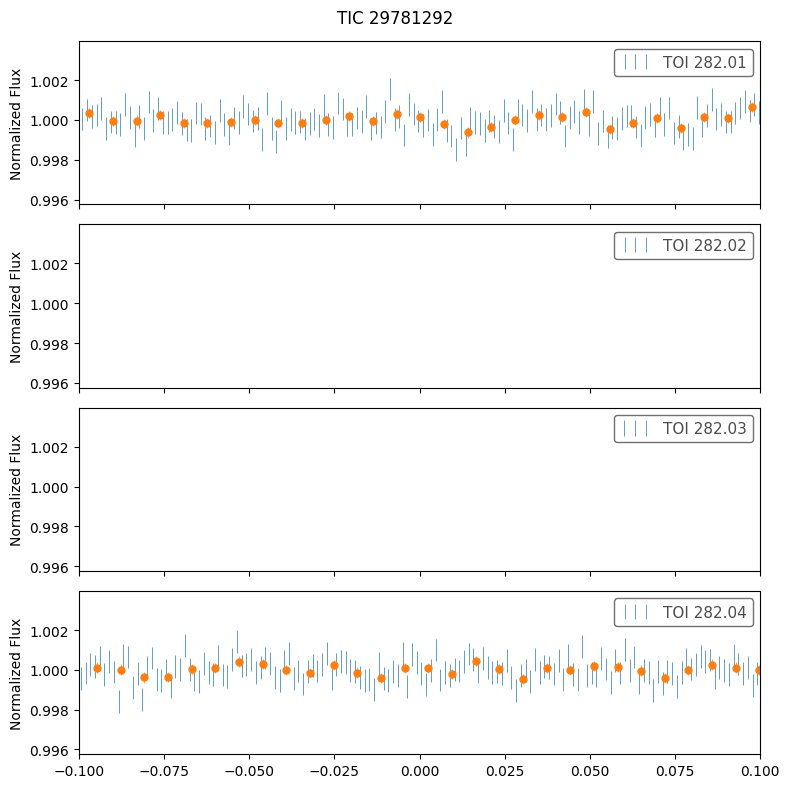

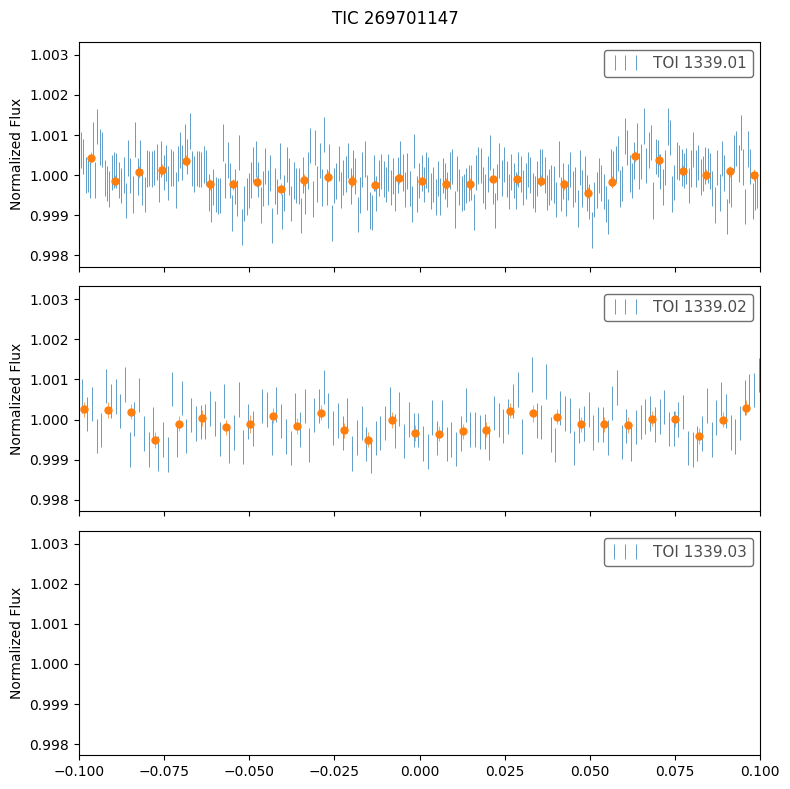

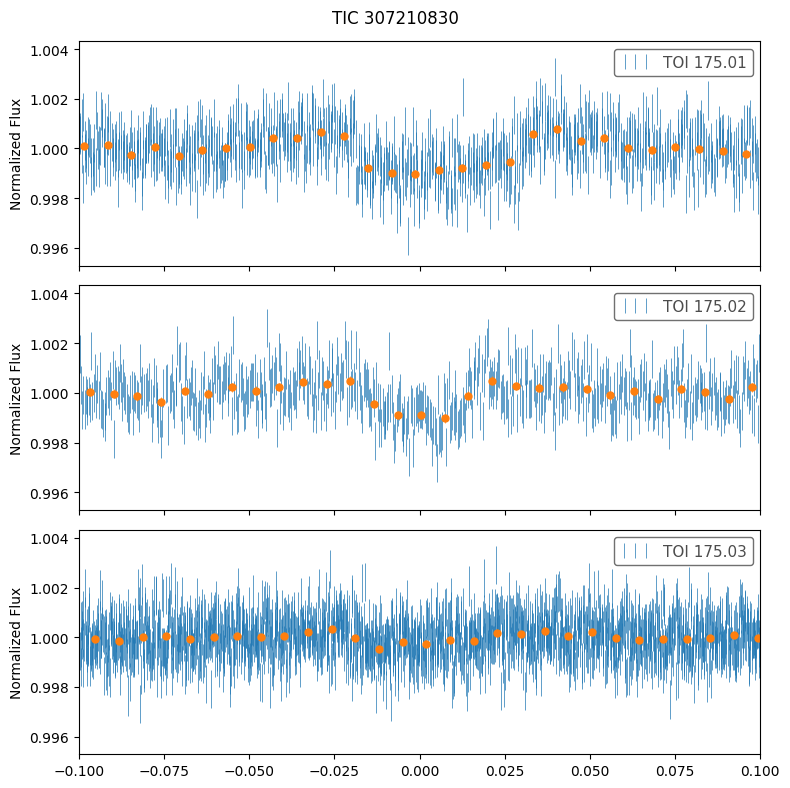

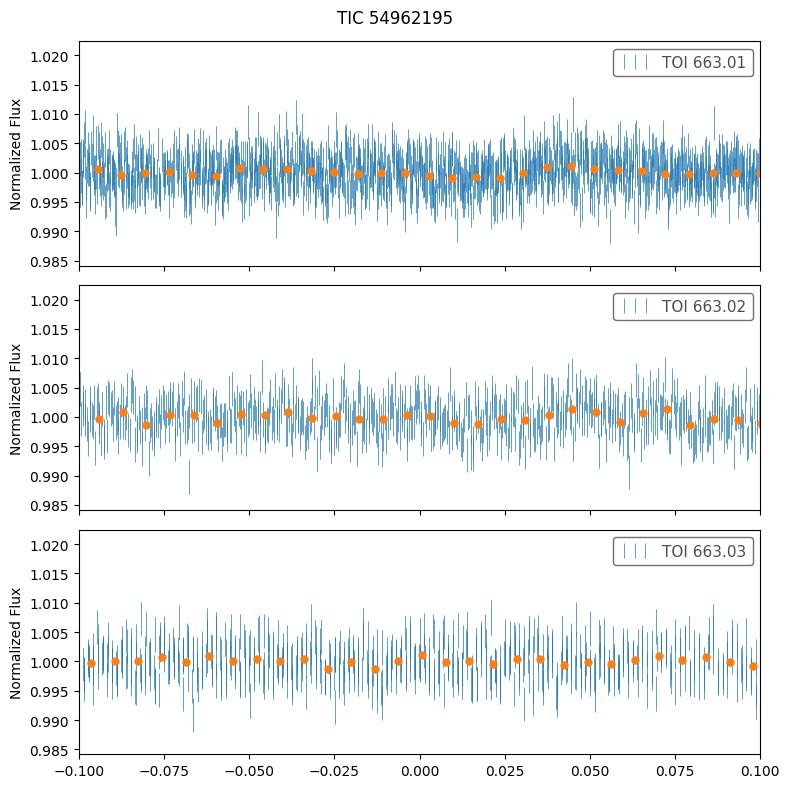

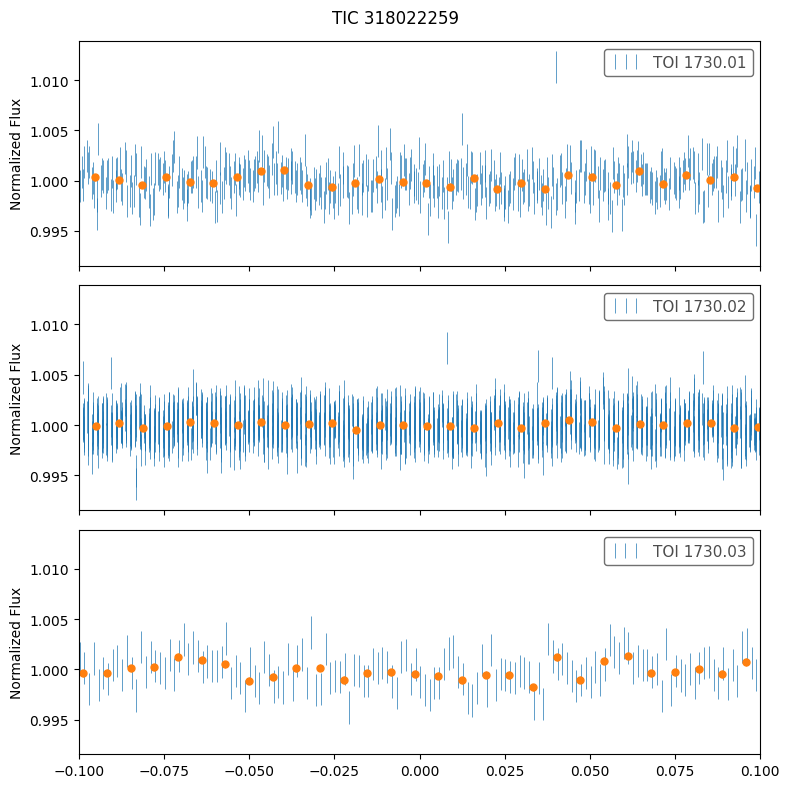

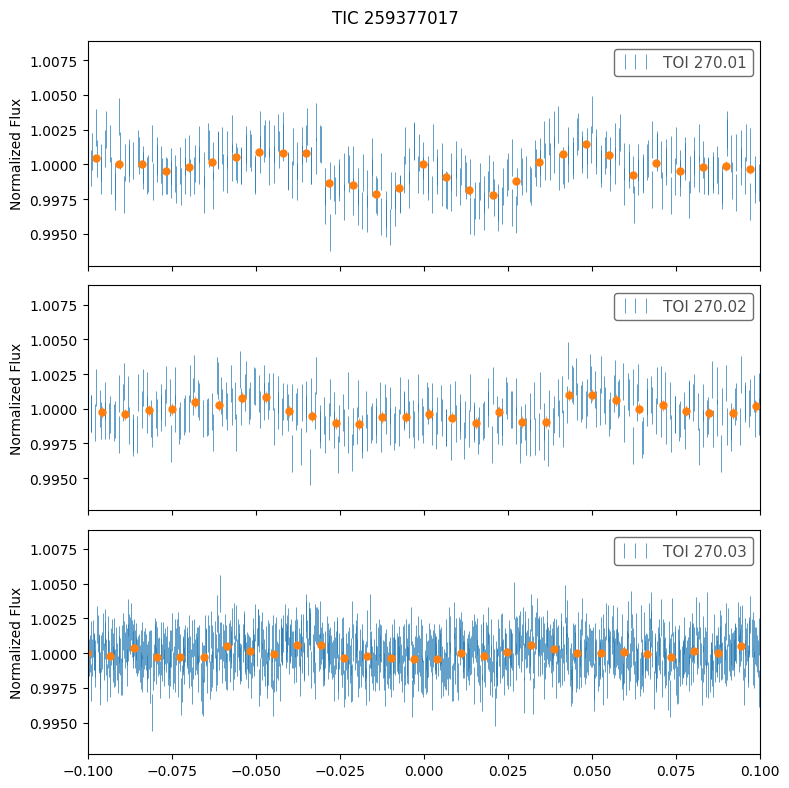

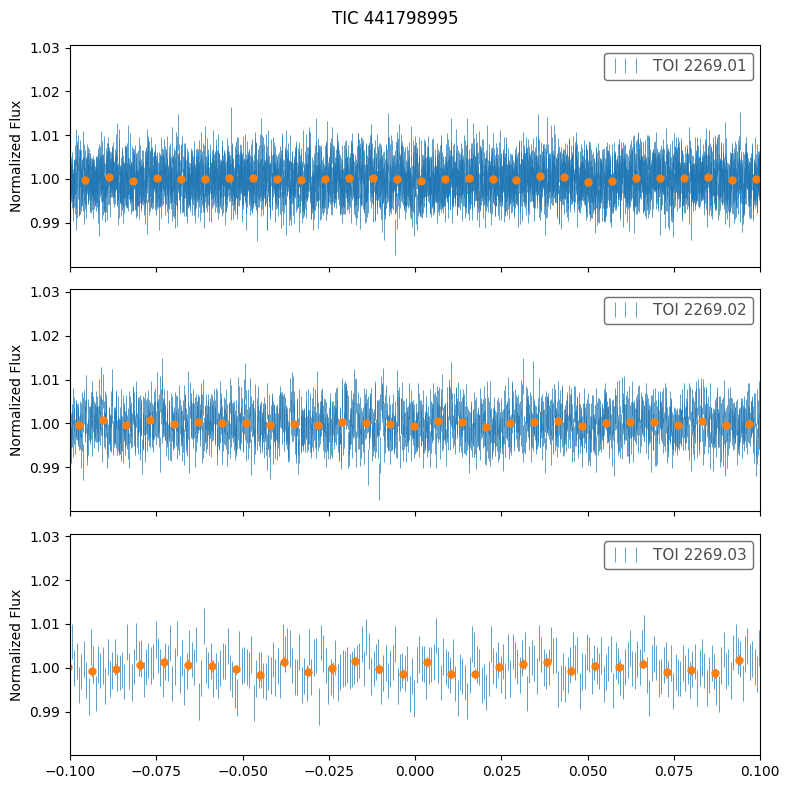

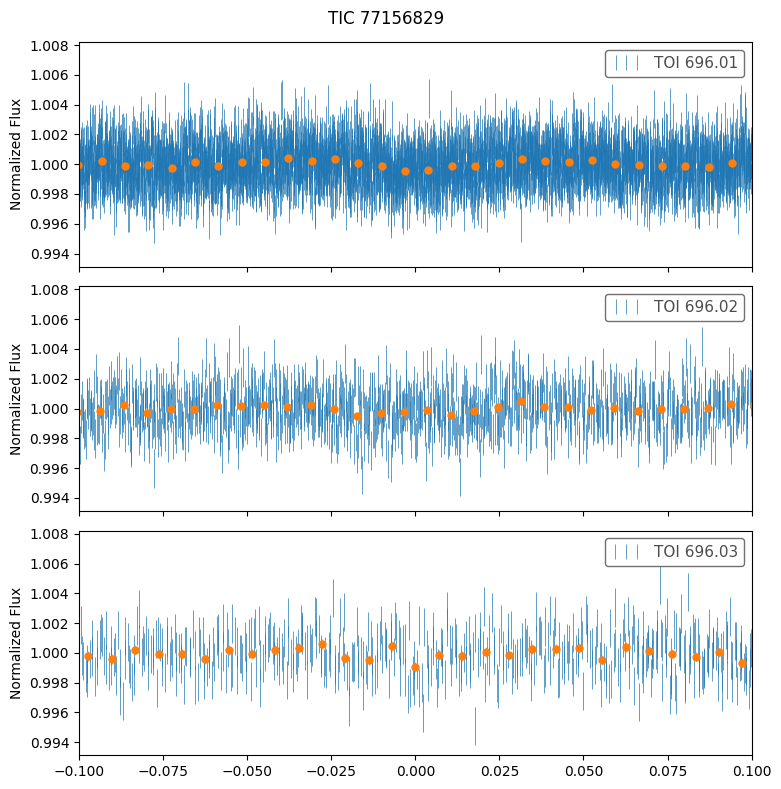

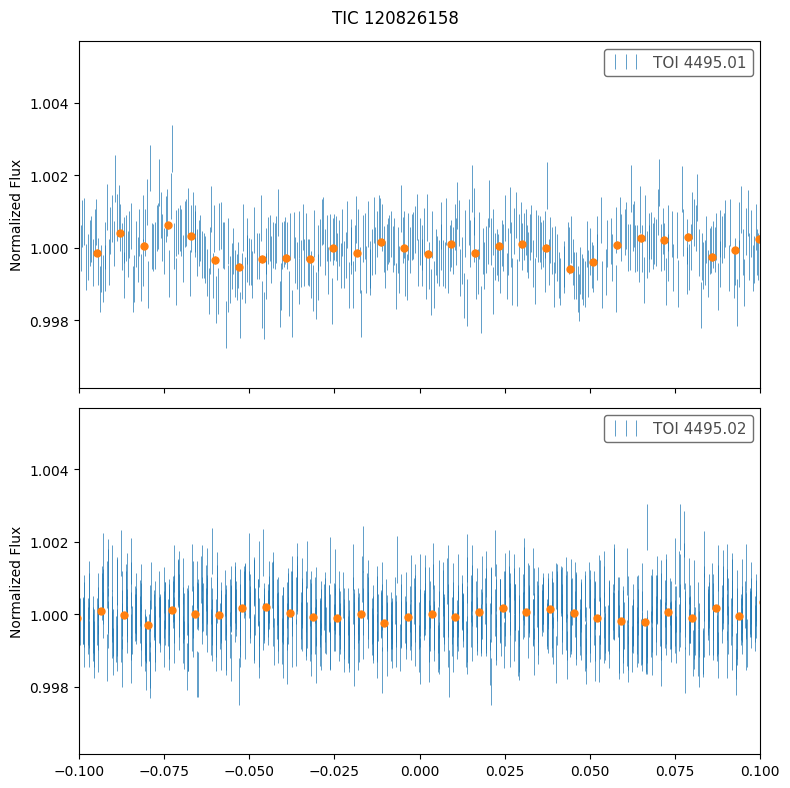

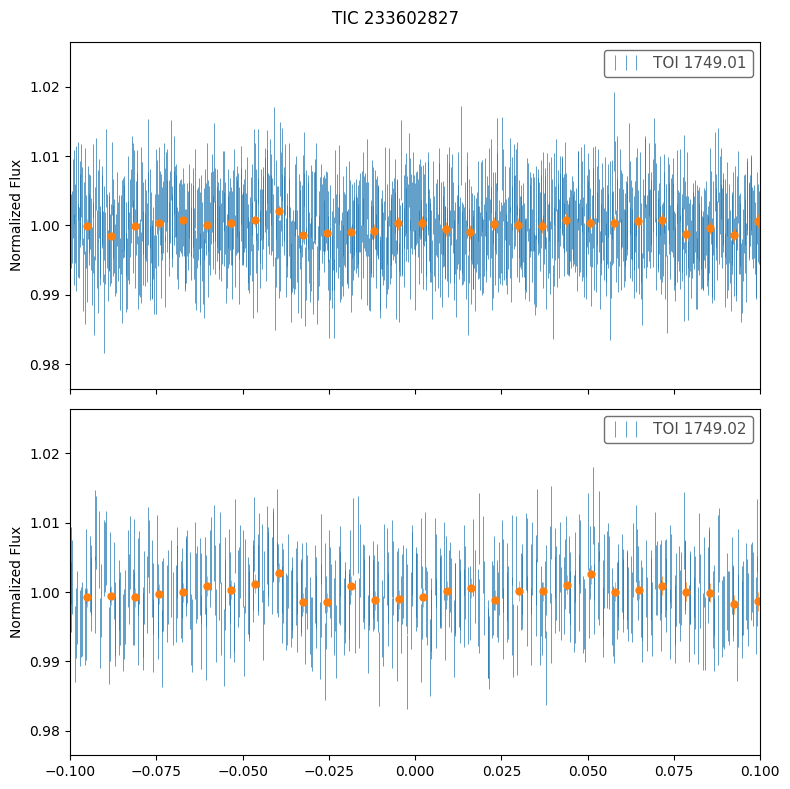

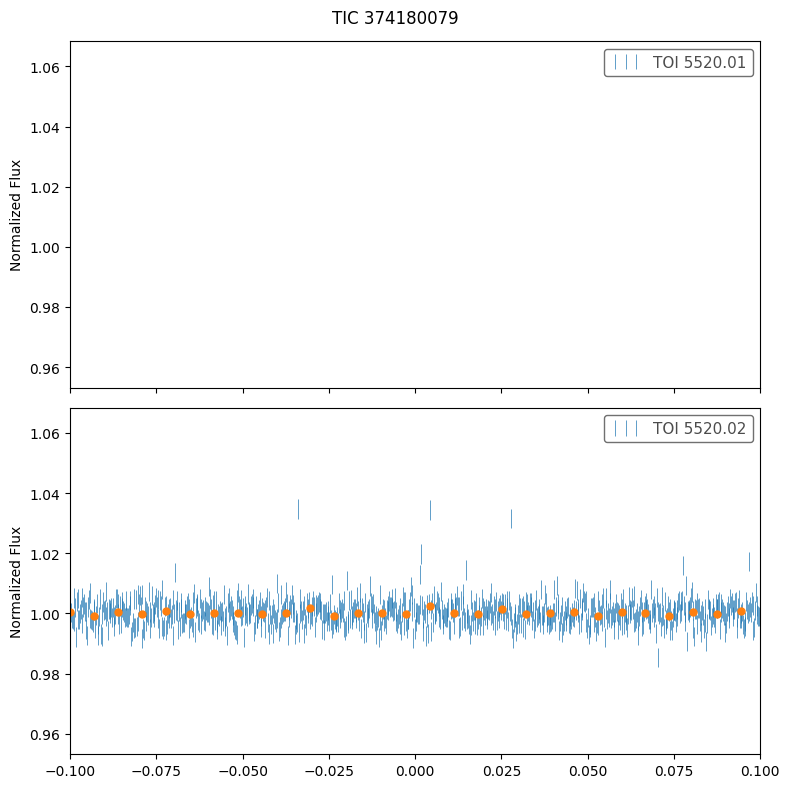

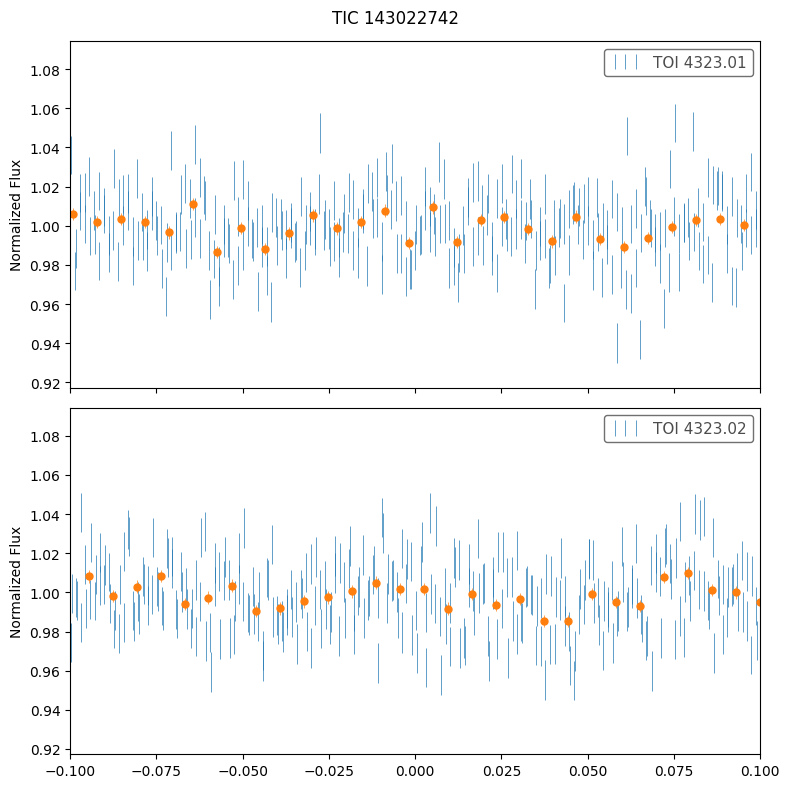

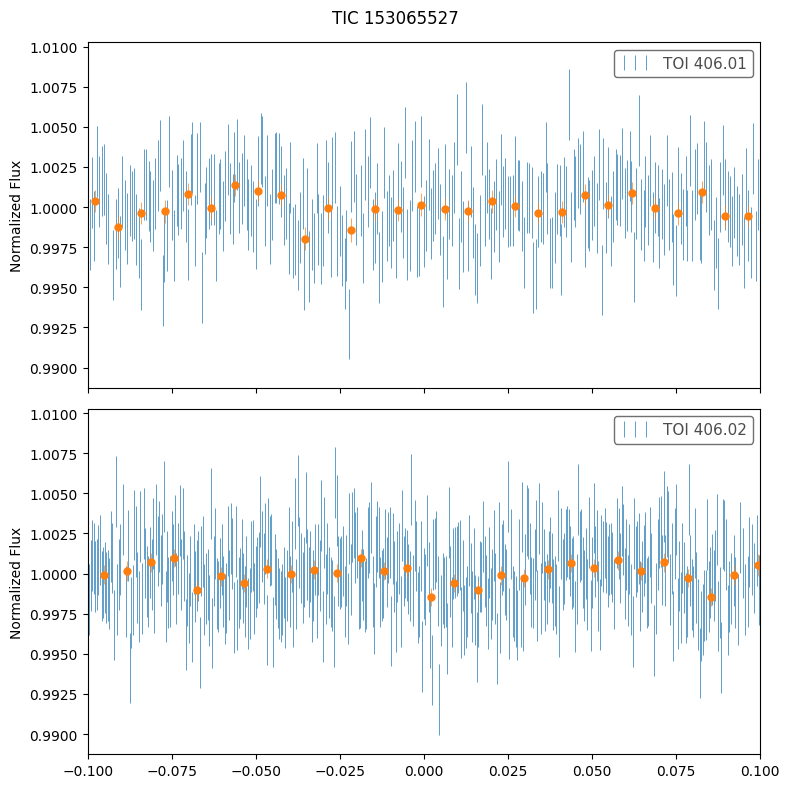

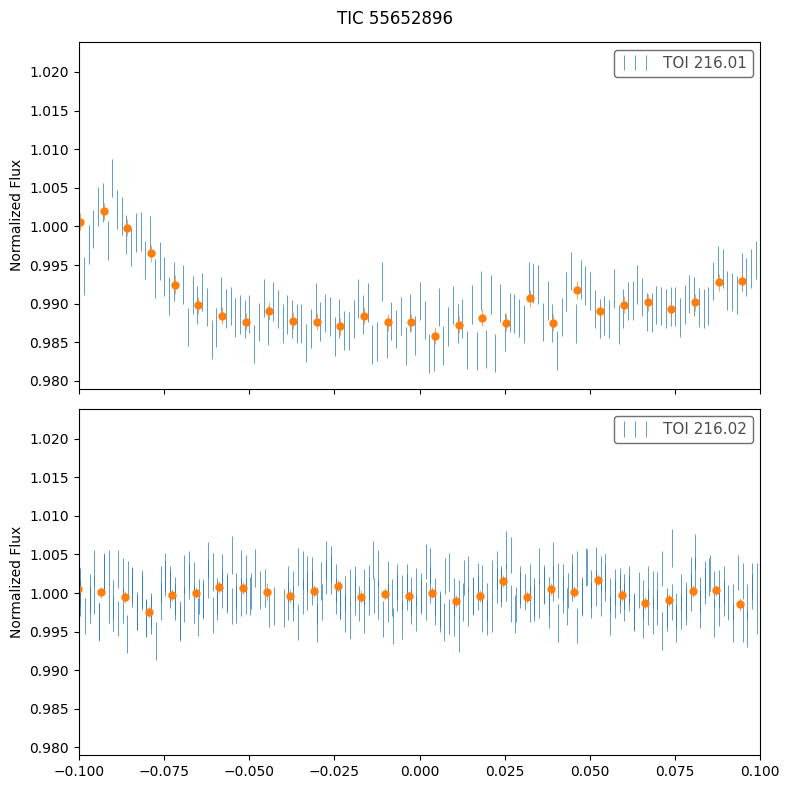

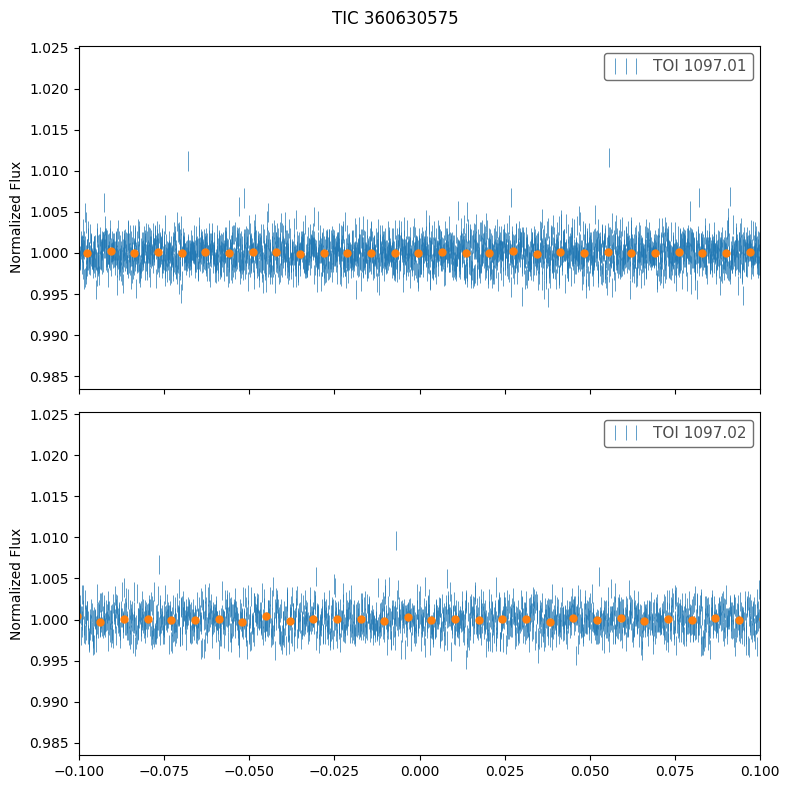

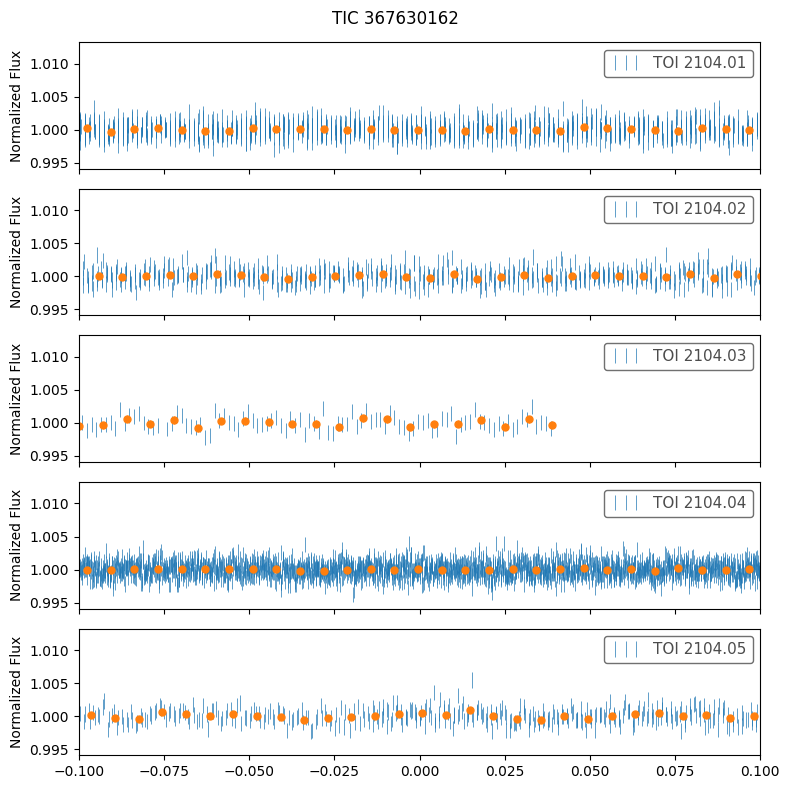

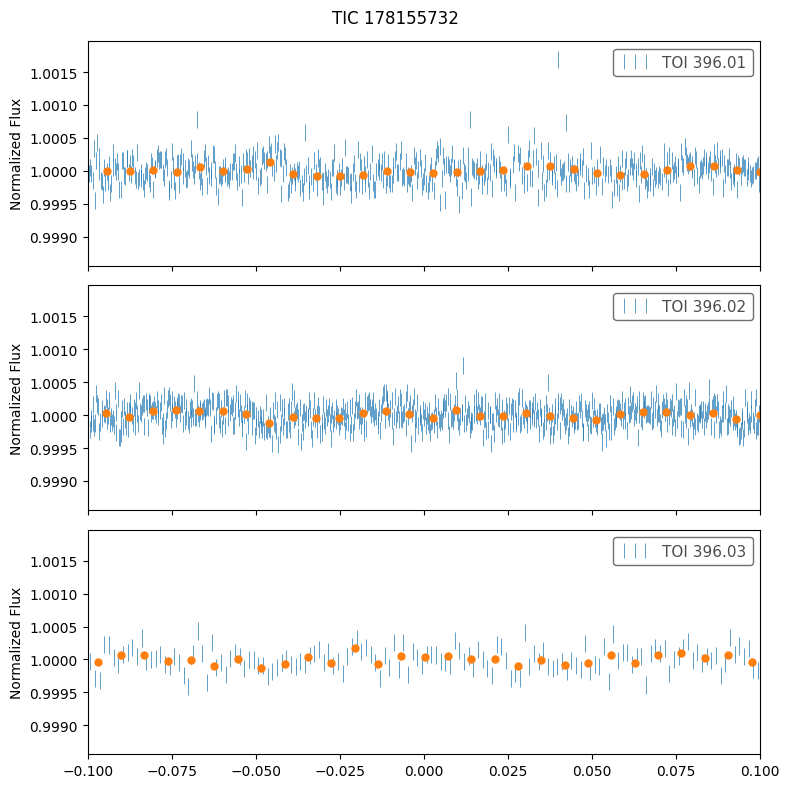

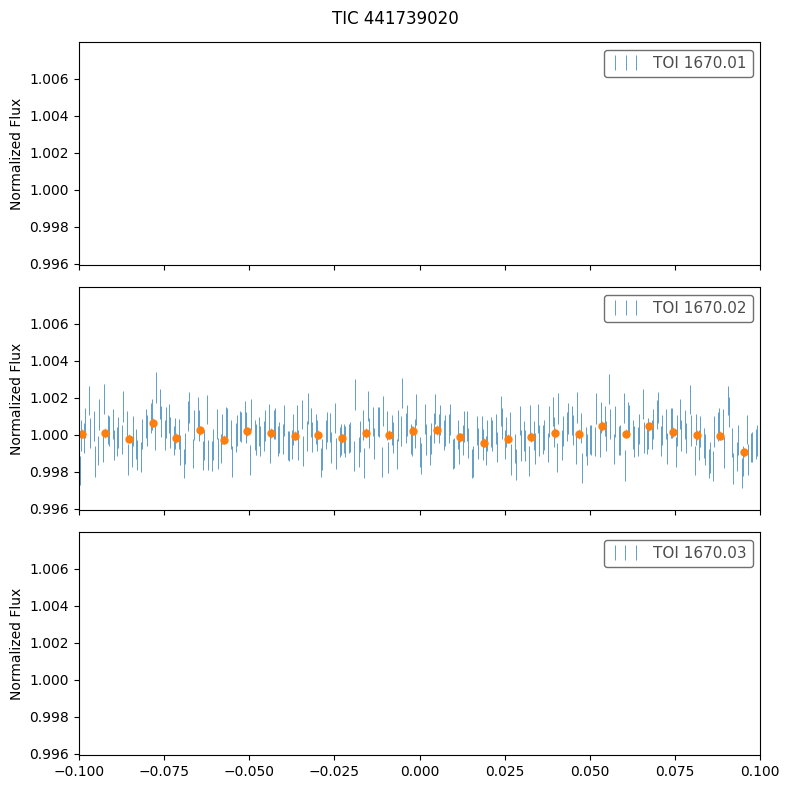

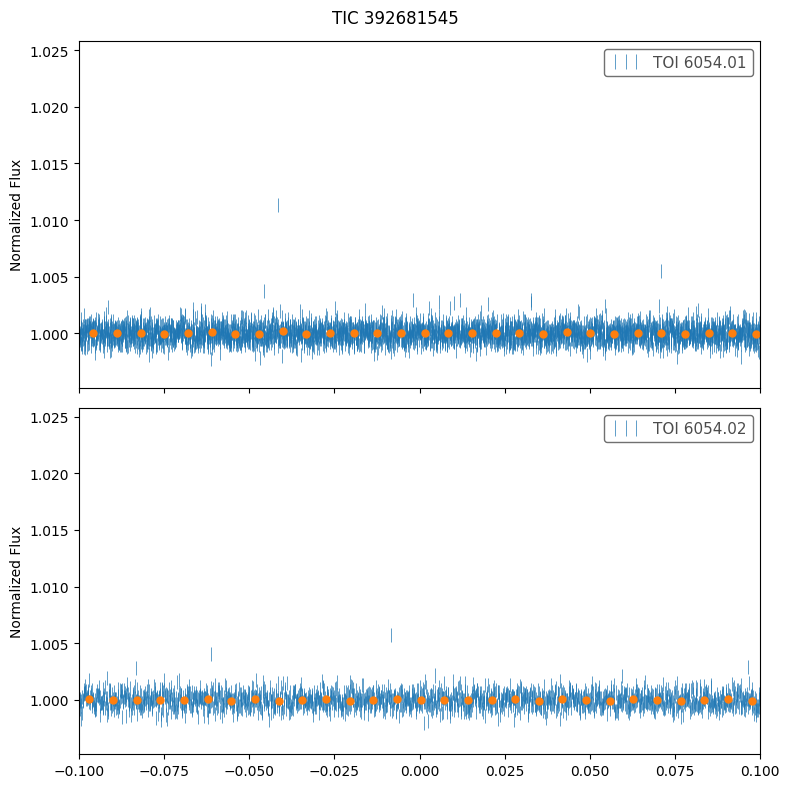

In [11]:
multi_sector = False

flatten_lc = False
for tic in resonant_toi['tic']:
    result = lk.search_lightcurve(f'TIC {tic}', author='SPOC')

    d = df[df['TIC ID'].apply(str).str.contains(str(tic))].reset_index(drop=True)
    
    if multi_sector:
        if flatten_lc:
            lc = result.download_all().stitch(lambda x: x.normalize().flatten())
        else:
            lc = result.download_all().stitch()
    else:
        lc = result.download()

    N = len(d)
    fig, axs = pl.subplots(N, 1, figsize=(8,8), sharex=True, tight_layout=True)

    axs = axs.flatten()

    bin_in_mins = 10
    for i,row in d.iterrows():
        toi = row['TOI']
        toiid = str(toi).split('.')[0]
        p, t0 = row["Period (days)"], row["Epoch (BJD)"] - 2457000
        fold = lc.flatten().fold(period=p, epoch_time=t0)
        _ = fold.errorbar(label=f"TOI {toi}", ax=axs[i])
        _ = fold.bin(time_bin_size=bin_in_mins*u.minute).errorbar(marker='o', ms=5, label="_nolegend_", ax=axs[i])
        tdur = row['Duration (hours)']/24
        if i<N:
            axs[i].set_xlabel("")
        axs[i].set_xlim(-0.1,0.1)
    fig.suptitle(f"TIC {tic}")
    fp = f"../data/tois/toi{toiid}"
    if multi_sector:
        fp+='_multi'
    fig.savefig(fp+'.png', bbox_inches='tight')
    print('Saved: ', fp)

## check signs of Prot

In [ ]:
multi_sector = False

for i,row in resonant_toi.iterrows(): 
    tic = row['tic']
    d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
    toi = str(d.TOI.iloc[0]).split('.')[0]
    result = lk.search_lightcurve(f'TIC {tic}', author='SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        ax = lc.scatter()
        ax.set_title(f"TOI {toi} (sector {lc.sector})")

In [ ]:
df[df['TIC ID'].isin([347332255])]['Period (days)']

In [1]:
import pandas as pd

resonant_ctoi = pd.read_csv('../data/tics_resonance_from_ctoi.csv', index_col=0)
resonant_ctoi

,tic,1st order,2nd order
0,204497617,True,True
1,29478974,True,True
2,207080350,True,True
3,347332255,True,True
4,253922296,NaN,True


In [1]:
import sys
sys.path.insert(0, '../code')
from utils import get_ctois

df2 = get_ctois()

In [2]:
df2.columns

Index(['TIC ID', 'CTOI', 'Promoted to TOI', 'MASTER', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'User Disposition', 'TFOPWG Disposition',
       'TESS Mag', 'TESS Mag err', 'RA', 'Dec', 'PM RA (mas/yr)',
       'PM RA err (mas/yr)', 'PM Dec (mas/yr)', 'PM RA (mas/yr).1',
       'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)', 'Period (days) err',
       'Depth mmag', 'Depth mmag err', 'Depth (ppm)', 'Depth (ppm) err',
       'Duration ((hours))', 'Duration ((hours)) err', 'Inclination (deg)',
       'Inclination (deg) err', 'Impact Param', 'Impact Param err',
       'Rad_p/Rad_s', 'Rad_p/Rad_s err', 'a/Rad_s', 'a/Rad_s err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Mass (M_Earth)', 'Mass (M_Earth) err', 'Insolation (Earth Flux)',
       'Insolation (Earth Flux) err', 'Equilibrium Temp (K)',
       'Equilibrium Temp (K) err', 'Fitted Stellar Density (g/cm^3)',
       'Fitted Stellar Density (g/cm^3) err', 'Semi-Major Axis (AU)',
       'Semi-Ma

In [ ]:
df[df['TIC ID'].isin([347332255])]['Period (days)']

In [ ]:
df2[df2['TIC ID'].isin([347332255])]['Period (days)']

In [ ]:
resonant_ctoi

In [ ]:
multi_sector = True
flatten_lc = False
for tic in resonant_ctoi['tic']:
    result = lk.search_lightcurve(f'TIC {tic}', author='SPOC')

    d = df2[df2['TIC ID'].apply(str).str.contains(str(tic))].reset_index(drop=True)
    
    if multi_sector:
        if flatten_lc:
            lc = result.download_all().stitch(lambda x: x.normalize().flatten())
        else:
            lc = result.download_all().stitch()
    else:
        lc = result.download()

    N = len(d)
    fig, axs = pl.subplots(N, 1, figsize=(8,8), sharex=True, tight_layout=True)

    axs = axs.flatten()

    bin_in_mins = 10
    for i,row in d.iterrows():
        ctoi = row['CTOI']
        p, t0 = row["Period (days)"], row["Transit Epoch (BJD)"] - 2457000
        assert str(row["Transit Epoch (BJD)"])!='nan'
            
        fold = lc.flatten().fold(period=p, epoch_time=t0)
        _ = fold.errorbar(label=f"{ctoi}", ax=axs[i])
        _ = fold.bin(time_bin_size=bin_in_mins*u.minute).errorbar(marker='o', ms=5, label="_nolegend_", ax=axs[i])
        tdur = row['Duration (hrs)']/24
        if i<N:
            axs[i].set_xlabel("")
        axs[i].set_xlim(-0.1,0.1)
    fig.suptitle(f"TIC {tic}")
    fp = f"../data/ctois/tic{tic}"
    if multi_sector:
        fp+='_multi'
    fig.savefig(fp+'.png', bbox_inches='tight')
    print('Saved: ', fp)

In [ ]:
multi_sector = False

for i,row in resonant_ctoi.iterrows(): 
    tic = row['tic']
    d = df2[df2['TIC ID'].apply(str).str.contains(str(tic))]
    ctoi = str(d.CTOI.iloc[0]).split('.')[0]
    result = lk.search_lightcurve(f'TIC {tic}', author='SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        ax = lc.scatter()
        ax.set_title(f"CTOI {ctoi} (sector {lc.sector})")

## check transit signal

In [ ]:
import matplotlib.pyplot as pl

multi_sector = False

for i,row in resonant_toi.iterrows():
    tic = row['tic']
    if i<3:
        d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
        result = lk.search_lightcurve(f'TIC {tic}', author='SPOC')
        if result:
            if multi_sector or (d["Period (days)"].max()>12):
                lc = result.download_all().stitch()
            else:
                lc = result.download()
            flat = lc.flatten()
            for i,row in d.iterrows():
                p, t0 = row["Period (days)"], row["Epoch (BJD)"]-2457000
                fold = flat.fold(period=p, epoch_time=t0)
                ax = fold.scatter(label=f"TOI {row['TOI']}")
                ax.set_title(f"P={p:.2f}d")
                if True:
                    fold.plot_river();
pl.close()

In [ ]:
import matplotlib.pyplot as pl

multi_sector = False

for i,row in resonant_toi.iterrows():
    tic = row['tic']
    if (i>3) and (i<6):
        d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
        result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
        if result:
            if multi_sector or (d["Period (days)"].max()>12):
                lc = result.download_all().stitch()
            else:
                lc = result.download()
            flat = lc.flatten()
            for i,row in d.iterrows():
                p, t0 = row["Period (days)"], row["Epoch (BJD)"]-2457000
                fold = flat.fold(period=p, epoch_time=t0)
                ax = fold.scatter(label=f"TOI {row['TOI']}")
                ax.set_title(f"P={p:.2f}d")
                if True:
                    fold.plot_river();
pl.close()